In [1]:
using Pkg
Pkg.add("CSV")
Pkg.add("Clustering")
Pkg.add("NBInclude")
Pkg.add("Plots")

using CSV, DataFrames, LinearAlgebra, Clustering, Plots, RDatasets, NBInclude
@nbinclude("functions.ipynb")

   Updating registry at `~/.julia/registries/General`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


calculateK (generic function with 1 method)

In [2]:
function calculateK(laplacianMatrix,size)
    flush(stdout)
    eigvalLaplacian = eigvals(laplacianMatrix)
    display(eigvalLaplacian)
    maxGap = -1
    bestK = -1

    for k = 2:size
        print(eigvalLaplacian[k])
        if (typeof(eigvalLaplacian[k]) != Complex)
            display(bestK)
            return bestK
        end
        gap = eigvalLaplacian[k] - eigvalLaplacian[k-1]
        if (gap > maxGap)
            maxGap = gap
            bestK = k-1
            print(bestK)
        end
    end
    display(bestK)
    return bestK
end

calculateK (generic function with 2 methods)

500×500 Array{Float64,2}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0     1.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0     0.0  1.0  0.0  0.0  0.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0     1.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0     0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       8.732738e-03
      1       6.578785e-03      -2.153954e-03 |        0
      2       6.578785e-03       0.000000e+00 |        0
K-means converged with 2 iterations (objv = 0.006578784506955746)


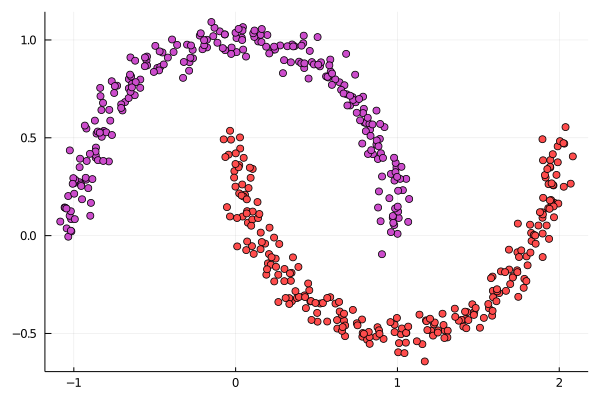

In [7]:
# Cluster Moons Dataset using spectral
flush(stdout)

moonsData = CSV.File("moons.csv")
data = moonsData
similarityFunction = euclideanBetweenTwoPoints
s = 500
epsilon = 0.25

similarityMatrix = generateSimilarityMatrix(similarityFunction, data, s)
adjacencyMatrix = generateAdjacencyMatrix(data, similarityMatrix, s,epsilon)
degreeMatrix = generateDegreeMatrix(adjacencyMatrix, s)
laplacianMatrix = degreeMatrix - adjacencyMatrix
#normalizedLaplacianMatrix = generateNormalizedLaplacianMatrix(degreeMatrix, laplacianMatrix, s)
normalizedRWLaplacian = generateNormRWLaplacian(degreeMatrix,laplacianMatrix,s)

#ourLaplace = normalizedLaplacianMatrix
ourLaplace = normalizedRWLaplacian
#m = calculateK(ourLaplace,s)
k = 2
eigvecLaplacian = eigvecs(ourLaplace)
kEigvecLaplacian = getFirstKEigvecs(eigvecLaplacian, s, k)

X = transpose(kEigvecLaplacian)
R = kmeans(X, k; maxiter=300, display=:iter)

# plot with the point color mapped to the assigned cluster index
scatter(data.x, data.y, marker_z=R.assignments,
        color=:lightrainbow, legend=false)


500×500 Array{Float64,2}:
 1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  …  1.0  0.0  0.0  1.0  1.0  1.0  1.0
 0.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0     0.0  1.0  1.0  0.0  0.0  0.0  0.0
 0.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0     0.0  1.0  1.0  0.0  0.0  0.0  0.0
 0.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0     0.0  1.0  1.0  0.0  0.0  0.0  0.0
 0.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0     0.0  1.0  1.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  …  1.0  0.0  0.0  1.0  1.0  1.0  1.0
 0.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0     0.0  1.0  1.0  0.0  0.0  0.0  0.0
 0.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0     0.0  1.0  1.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0     1.0  0.0  0.0  1.0  1.0  1.0  1.0
 1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0     1.0  0.0  0.0  1.0  1.0  1.0  1.0
 1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  …  1.0  0.0  0.0  1.0  1.0  1.0  1.0
 0.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0     0.0  1.0  1.0  0.0  0.0  0.0  0.0
 0.0  1.0  1.0  1.0  1.0  0.0  1.0  1.

  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       5.238129e-06
      1       5.100790e-06      -1.373392e-07 |        0
K-means converged with 1 iterations (objv = 5.1007903240363195e-6)


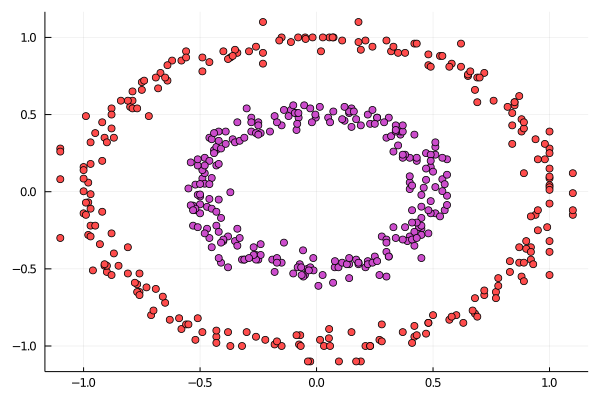

In [8]:
# Cluster Circles Dataset using spectral
flush(stdout)

circleData = CSV.File("circles.csv")
data = circleData
similarityFunction = euclideanToFixed
s = 500
epsilon = 0.25

similarityMatrix = generateSimilarityMatrix(similarityFunction, data, s)
adjacencyMatrix = generateAdjacencyMatrix(data, similarityMatrix, s,epsilon)
degreeMatrix = generateDegreeMatrix(adjacencyMatrix, s)
laplacianMatrix = degreeMatrix - adjacencyMatrix
#normalizedLaplacianMatrix = generateNormalizedLaplacianMatrix(degreeMatrix, laplacianMatrix, s)
normalizedRWLaplacian = generateNormRWLaplacian(degreeMatrix,laplacianMatrix,s)

#ourLaplace = normalizedLaplacianMatrix
ourLaplace = normalizedRWLaplacian
#m = calculateK(ourLaplace,s)
k = 2
eigvecLaplacian = eigvecs(ourLaplace)
kEigvecLaplacian = getFirstKEigvecs(eigvecLaplacian, s, k)

X = transpose(kEigvecLaplacian)
R = kmeans(X, k; maxiter=300, display=:iter)

# plot with the point color mapped to the assigned cluster index
scatter(data.x, data.y, marker_z=R.assignments,
        color=:lightrainbow, legend=false)
